In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("C:\\Users\smailey\Desktop\lecture\csv\customerchurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.drop("customerID",axis=1,inplace=True)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df1 = df.copy()

In [10]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors='coerce')
df1.info

<bound method DataFrame.info of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL       

In [11]:
df1.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [12]:
df1.dropna(inplace=True)

In [13]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df1.shape

(7032, 20)

In [16]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
for i in df1:
    print(i,"-" ,df1[i].unique())
    

gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
tenure - [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService - ['No' 'Yes']
MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges - [29.85 56.95 53.85 ... 63.1  44.2  78

In [18]:
df1.replace('No internet service','No',inplace=True)

In [19]:
df1.replace('No phone service','No',inplace=True)

In [20]:
for i in df1:
    print(i,"-" ,df1[i].unique())
    

gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
tenure - [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService - ['No' 'Yes']
MultipleLines - ['No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes']
OnlineBackup - ['Yes' 'No']
DeviceProtection - ['No' 'Yes']
TechSupport - ['No' 'Yes']
StreamingTV - ['No' 'Yes']
StreamingMovies - ['No' 'Yes']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges - [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges - [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn - ['No' 'Yes']


In [21]:
df1.replace({'Yes':1,'No':0,'Female':1,'Male':0},inplace=True)

In [22]:
for i in df1:
    print(i,"-" ,df1[i].unique())

gender - [1 0]
SeniorCitizen - [0 1]
Partner - [1 0]
Dependents - [0 1]
tenure - [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService - [0 1]
MultipleLines - [0 1]
InternetService - ['DSL' 'Fiber optic' 0]
OnlineSecurity - [0 1]
OnlineBackup - [1 0]
DeviceProtection - [0 1]
TechSupport - [0 1]
StreamingTV - [0 1]
StreamingMovies - [0 1]
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - [1 0]
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges - [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges - [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn - [0 1]


In [23]:
final = pd.get_dummies(data=df1,drop_first=True)

In [24]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [25]:
tenure0 = final[final['Churn']==0].tenure
tenure1 = final[final['Churn']==1].tenure

In [26]:
tenure0

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [27]:
tenure1

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [28]:
import matplotlib.pyplot as plt

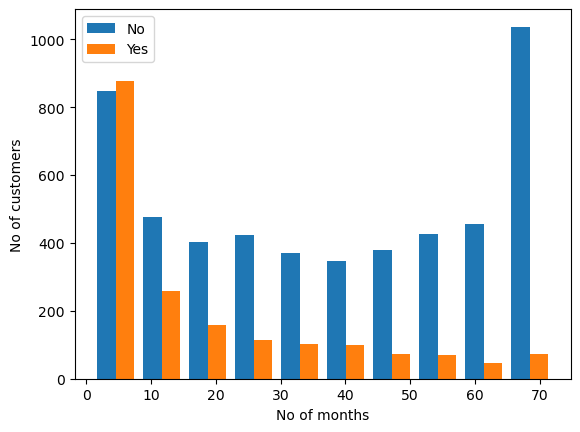

In [29]:
plt.hist([tenure0,tenure1],label=['No','Yes'])
plt.legend()
plt.xlabel('No of months')
plt.ylabel('No of customers')
plt.show()

In [30]:
monthlycharges0 = final[final['Churn']==0].MonthlyCharges
monthlycharges1 = final[final['Churn']==1].MonthlyCharges

In [31]:
monthlycharges0

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5163, dtype: float64

In [32]:
monthlycharges1

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

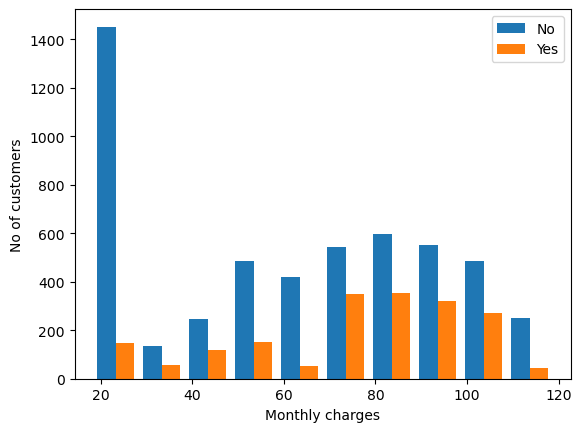

In [33]:
plt.hist([monthlycharges0,monthlycharges1],label=['No','Yes'])
plt.legend()
plt.xlabel('Monthly charges')
plt.ylabel('No of customers')
plt.show()

In [34]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [35]:
X = final.drop(['Churn'],axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,0,1,0,0,0,1,0


In [36]:
y = final.Churn
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
scaled = scaler.fit_transform(X)
scaled

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
scaled.shape

(7032, 23)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.20, random_state=42)

In [43]:
X_train.shape

(5625, 23)

In [44]:
X_test.shape

(1407, 23)

In [78]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(23,),activation='sigmoid')
])

In [79]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [81]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5458 - Accuracy: 0.7338
Epoch 2/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5398 - Accuracy: 0.7401
Epoch 3/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5347 - Accuracy: 0.7472
Epoch 4/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5302 - Accuracy: 0.7488
Epoch 5/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5263 - Accuracy: 0.7498
Epoch 6/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5229 - Accuracy: 0.7512
Epoch 7/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5199 - Accuracy: 0.7528
Epoch 8/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5171 - Accuracy: 0.7545
Epoch 9/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5147 - Accuracy: 0.7512
Epoch 10/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5128 - Accuracy: 0.7552


In [80]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
94/94 [==============================] - 2s 4ms/step - loss: 0.7778 - Accuracy: 0.5064
Epoch 2/10
94/94 [==============================] - 0s 4ms/step - loss: 0.7019 - Accuracy: 0.5525
Epoch 3/10
94/94 [==============================] - 0s 4ms/step - loss: 0.6631 - Accuracy: 0.6087
Epoch 4/10
94/94 [==============================] - 0s 3ms/step - loss: 0.6352 - Accuracy: 0.6415
Epoch 5/10
94/94 [==============================] - 0s 4ms/step - loss: 0.6139 - Accuracy: 0.6656
Epoch 6/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5964 - Accuracy: 0.6829
Epoch 7/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5822 - Accuracy: 0.7013
Epoch 8/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5708 - Accuracy: 0.7134
Epoch 9/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5609 - Accuracy: 0.7207
Epoch 10/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5526 - Accuracy: 0.7288


In [49]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(23,),activation='relu',kernel_initializer='ones',bias_initializer='zeros'),
    keras.layers.Dense(1 ,activation='sigmoid')
])

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [51]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
176/176 [==============================] - 4s 9ms/step - loss: 0.5468 - Accuracy: 0.7506
Epoch 2/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4375 - Accuracy: 0.7868
Epoch 3/10
176/176 [==============================] - 1s 6ms/step - loss: 0.4289 - Accuracy: 0.7954
Epoch 4/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4239 - Accuracy: 0.7980
Epoch 5/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4273 - Accuracy: 0.7975
Epoch 6/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4250 - Accuracy: 0.7991
Epoch 7/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4265 - Accuracy: 0.7982
Epoch 8/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4383 - Accuracy: 0.7934
Epoch 9/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4372 - Accuracy: 0.7922
Epoch 10/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4204 - Accuracy: 0.8014

In [52]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 4ms/step - loss: 0.4434 - Accuracy: 0.7775


[0.4433807134628296, 0.7775408625602722]

In [53]:
pred = model.predict(X_test)

44/44 [==============================] - 0s 3ms/step


In [54]:
pred

array([[0.01951084],
       [0.18839967],
       [0.7850768 ],
       ...,
       [0.13117996],
       [0.34821856],
       [0.00973716]], dtype=float32)

In [55]:
predicted =[]
for i in pred:
    if i > 0.5:
        predicted.append(1)
    else:
        predicted.append(0)
        

In [56]:
predicted

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [57]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

In [58]:
import seaborn as sns

<Axes: >

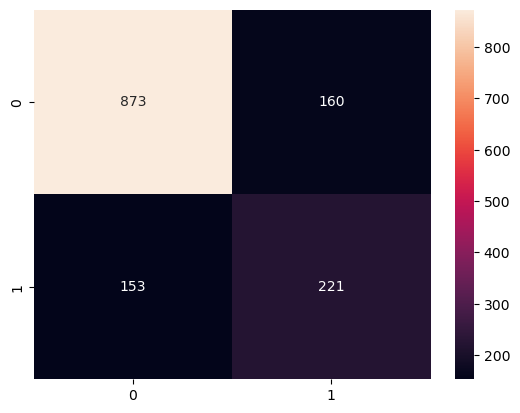

In [59]:
sns.heatmap(cm,annot=True,fmt='d')

In [60]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [61]:
final['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [62]:
df0=final[final['Churn']==0]
df1=final[final['Churn']==1]

In [63]:
df0.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
6,0,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,0,1,0,0,1,0,0
7,1,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,1,0,0,0,0,0,1


In [64]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,1,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,0,1,0,0,0,1,0
8,1,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,0,1,0,0,0,1,0
13,0,0,0,0,49,1,1,0,1,1,...,103.70,5036.30,1,0,1,0,0,0,0,0


In [65]:
df0_undersample = df0.sample(1869)

In [66]:
df0.iloc[0:1869]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
6,0,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,0,1,0,0,1,0,0
7,1,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,1,0,0,0,7,1,0,0,0,1,...,100.40,715.00,0,0,1,0,0,0,1,0
2531,1,0,1,0,71,1,1,0,0,0,...,24.45,1681.60,0,0,0,0,1,1,0,0
2532,1,1,0,0,41,1,0,0,0,1,...,101.10,4016.20,0,0,1,1,0,0,0,0
2533,0,0,1,1,67,0,0,1,0,0,...,50.90,3281.65,0,1,0,0,1,1,0,0


In [67]:
df0_undersample.shape

(1869, 24)

In [68]:
df0_undersample

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6450,1,0,1,1,27,1,0,0,0,0,...,19.90,550.10,0,0,0,0,1,0,0,1
1019,1,0,0,0,23,1,0,0,0,0,...,19.50,470.20,0,0,0,0,0,0,0,1
6528,0,0,1,1,70,1,0,0,0,0,...,20.35,1458.10,0,0,0,0,1,1,0,0
1610,0,0,1,1,51,1,0,1,1,0,...,60.50,3121.45,0,1,0,0,1,1,0,0
1482,1,1,0,0,13,1,0,0,0,1,...,96.85,1235.55,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,1,1,59,1,0,0,0,0,...,19.30,1192.70,0,0,0,0,1,1,0,0
6890,0,0,0,0,53,1,0,0,0,1,...,61.10,3357.90,0,1,0,1,0,0,1,0
553,1,0,1,1,23,1,1,0,0,0,...,25.60,514.75,0,0,0,0,1,1,0,0
3012,0,0,1,1,54,1,1,1,1,0,...,65.65,3566.70,0,1,0,0,1,1,0,0


In [69]:
df0_undersample.shape

(1869, 24)

In [70]:
undersample = pd.concat([df0_undersample,df1])

In [71]:
undersample

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6450,1,0,1,1,27,1,0,0,0,0,...,19.90,550.10,0,0,0,0,1,0,0,1
1019,1,0,0,0,23,1,0,0,0,0,...,19.50,470.20,0,0,0,0,0,0,0,1
6528,0,0,1,1,70,1,0,0,0,0,...,20.35,1458.10,0,0,0,0,1,1,0,0
1610,0,0,1,1,51,1,0,1,1,0,...,60.50,3121.45,0,1,0,0,1,1,0,0
1482,1,1,0,0,13,1,0,0,0,1,...,96.85,1235.55,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,0,0,0,...,59.80,727.80,1,1,0,1,0,0,1,0
7026,1,0,0,0,9,1,0,0,0,0,...,44.20,403.35,1,1,0,0,0,0,0,0
7032,0,1,0,0,1,1,1,0,0,0,...,75.75,75.75,1,0,1,0,0,0,1,0
7034,1,0,0,0,67,1,1,1,1,1,...,102.95,6886.25,1,0,1,0,0,1,0,0


In [72]:
undersample.shape

(3738, 24)

In [73]:
undersample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6450,1,0,1,1,27,1,0,0,0,0,...,19.90,550.10,0,0,0,0,1,0,0,1
1019,1,0,0,0,23,1,0,0,0,0,...,19.50,470.20,0,0,0,0,0,0,0,1
6528,0,0,1,1,70,1,0,0,0,0,...,20.35,1458.10,0,0,0,0,1,1,0,0
1610,0,0,1,1,51,1,0,1,1,0,...,60.50,3121.45,0,1,0,0,1,1,0,0
1482,1,1,0,0,13,1,0,0,0,1,...,96.85,1235.55,0,0,1,0,0,0,1,0


In [74]:
col = undersample[['tenure','MonthlyCharges','TotalCharges']]

In [75]:
undersample[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(col)

In [76]:
undersample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6450,1,0,1,1,0.366197,1,0,0,0,0,...,0.014948,0.061303,0,0,0,0,1,0,0,1
1019,1,0,0,0,0.309859,1,0,0,0,0,...,0.010962,0.052083,0,0,0,0,0,0,0,1
6528,0,0,1,1,0.971831,1,0,0,0,0,...,0.019432,0.166081,0,0,0,0,1,1,0,0
1610,0,0,1,1,0.704225,1,0,1,1,0,...,0.419532,0.358022,0,1,0,0,1,1,0,0
1482,1,1,0,0,0.169014,1,0,0,0,1,...,0.781764,0.140400,0,0,1,0,0,0,1,0


In [85]:
 X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(undersample.drop('Churn',axis=1),undersample.Churn , test_size=0.20, random_state=42)

In [86]:
X_train_min.shape

(2990, 23)

In [87]:
X_test_min.shape

(748, 23)

In [88]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(23,),activation="sigmoid")
])

In [89]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [90]:
model.fit(X_train_min,y_train_min,epochs=10)

Epoch 1/10
94/94 [==============================] - 1s 3ms/step - loss: 0.6980 - Accuracy: 0.5525
Epoch 2/10
94/94 [==============================] - 0s 3ms/step - loss: 0.6449 - Accuracy: 0.6321
Epoch 3/10
94/94 [==============================] - 0s 4ms/step - loss: 0.6158 - Accuracy: 0.6696
Epoch 4/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5942 - Accuracy: 0.6977
Epoch 5/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5777 - Accuracy: 0.7137
Epoch 6/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5644 - Accuracy: 0.7231
Epoch 7/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5542 - Accuracy: 0.7304
Epoch 8/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5459 - Accuracy: 0.7351
Epoch 9/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5391 - Accuracy: 0.7418
Epoch 10/10
94/94 [==============================] - 0s 5ms/step - loss: 0.5334 - Accuracy: 0.7458


In [95]:
sum0,sum1 = final['Churn'].value_counts()

In [96]:
sum1

1869

In [97]:
sum0

5163

In [98]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,1,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,0,1,0,0,0,1,0
8,1,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,0,1,0,0,0,1,0
13,0,0,0,0,49,1,1,0,1,1,...,103.70,5036.30,1,0,1,0,0,0,0,0


In [99]:
df1_oversample = df1.sample(sum0,replace=True)

In [100]:
df1_oversample.shape

(5163, 24)

In [101]:
!pip install imbalanced_learn

In [104]:
from imblearn.over_sampling import SMOTE

In [105]:
smote = SMOTE(sampling_strategy='minority')

In [106]:
X = final.drop("Churn",axis=1)

In [107]:
y=final.Churn

In [108]:
X_sm,y_sm = smote.fit_resample(X,y)

In [109]:
X_sm.shape

(10326, 23)

In [110]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [111]:
X_train_sm.shape

(8260, 23)

In [112]:
X_test_sm

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4139,0,0,1,0,35,1,1,0,0,0,...,1,75.200000,2576.200000,0,1,0,0,0,1,0
1692,1,0,1,1,63,1,0,1,1,1,...,0,75.550000,4707.850000,1,0,0,1,1,0,0
2692,1,0,1,0,71,1,1,1,1,1,...,0,87.950000,6365.350000,1,0,0,1,0,0,0
7704,1,0,0,0,1,1,0,0,0,1,...,0,75.270284,75.270284,0,1,0,0,0,1,0
321,1,0,1,1,72,0,0,0,1,1,...,1,60.000000,4264.000000,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,1,1,0,0,72,1,1,1,1,0,...,1,110.100000,7746.700000,0,1,0,1,0,0,0
4528,0,0,0,0,1,1,0,0,0,0,...,1,69.350000,69.350000,0,1,0,0,0,1,0
8074,0,1,0,0,29,1,1,0,0,0,...,1,97.884517,3008.104805,0,1,0,0,0,0,0
4730,0,0,0,0,5,1,1,0,1,1,...,0,104.100000,541.900000,0,1,0,0,0,0,1


In [118]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(23,),activation="sigmoid")
])

In [119]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [120]:
model.fit(X_train_sm,y_train_sm,epochs=10)

Epoch 1/10
259/259 [==============================] - 2s 3ms/step - loss: 7.9772 - Accuracy: 0.3576
Epoch 2/10
259/259 [==============================] - 1s 3ms/step - loss: 1.1129 - Accuracy: 0.5200
Epoch 3/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5475 - Accuracy: 0.7203
Epoch 4/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5201 - Accuracy: 0.7470
Epoch 5/10
259/259 [==============================] - 1s 4ms/step - loss: 0.5016 - Accuracy: 0.7588
Epoch 6/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4970 - Accuracy: 0.7713
Epoch 7/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4650 - Accuracy: 0.7855
Epoch 8/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4946 - Accuracy: 0.7801
Epoch 9/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4907 - Accuracy: 0.7843
Epoch 10/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4592 - Accuracy: 0.7903